<a href="https://colab.research.google.com/github/victoregomezf-maker/seminario/blob/main/clase11_12_EDA_PREDICCIONES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

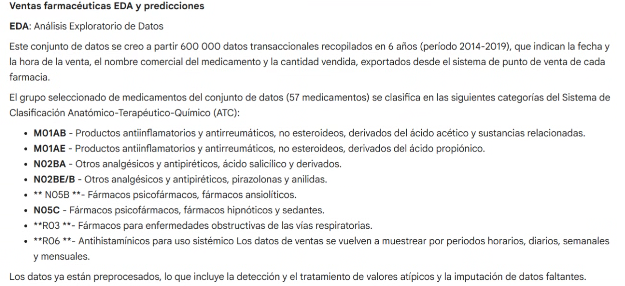

In [1]:
#PROCESAMIENTO DE DATOS
import pandas as pd
import numpy as np
#VISUALIZACION GRAFICA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('salesdaily.csv')
df

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,1/2/2014,0.00,3.670,3.40,32.40,7.0,0.0,0.0,2.00,2014,1,248,Thursday
1,1/3/2014,8.00,4.000,4.40,50.60,16.0,0.0,20.0,4.00,2014,1,276,Friday
2,1/4/2014,2.00,1.000,6.50,61.85,10.0,0.0,9.0,1.00,2014,1,276,Saturday
3,1/5/2014,4.00,3.000,7.00,41.10,8.0,0.0,3.0,0.00,2014,1,276,Sunday
4,1/6/2014,5.00,1.000,4.50,21.70,16.0,2.0,6.0,2.00,2014,1,276,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101,10/4/2019,7.34,5.683,2.25,22.45,13.0,0.0,1.0,1.00,2019,10,276,Friday
2102,10/5/2019,3.84,5.010,6.00,25.40,7.0,0.0,0.0,0.33,2019,10,276,Saturday
2103,10/6/2019,4.00,11.690,2.00,34.60,6.0,0.0,5.0,4.20,2019,10,276,Sunday
2104,10/7/2019,7.34,4.507,3.00,50.80,6.0,0.0,10.0,1.00,2019,10,276,Monday


In [3]:
df.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,1/2/2014,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
1,1/3/2014,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2,1/4/2014,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
3,1/5/2014,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
4,1/6/2014,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


In [4]:
#Analisis exploratorio de datos (EDA)
df.shape

(2106, 13)

In [5]:
df.isna().sum()

,0
datum,0
M01AB,0
M01AE,0
N02BA,0
N02BE,0
N05B,0
N05C,0
R03,0
R06,0
Year,0


In [6]:
#Convertir la columna "datum" a fecha y hora
df['datum'] = pd.to_datetime(df['datum'])

In [7]:
#sacar la cantidad de medicamentos por categoria
import plotly.express as px

In [8]:
#Trazar o dibujar la cantidad de medicamento de M01AB
fig = px.line(df, x='datum', y='M01AB', title='Quantity of M01AB over time')
fig.show()

In [9]:
#volumen de ventas mensuales
df_m01ab = df[['M01AB','Year','Month']]
df_m01ab

,M01AB,Year,Month
0,0.00,2014,1
1,8.00,2014,1
2,2.00,2014,1
3,4.00,2014,1
4,5.00,2014,1
...,...,...,...
2101,7.34,2019,10
2102,3.84,2019,10
2103,4.00,2019,10
2104,7.34,2019,10


In [10]:
#volumen de ventas mensuales
df_m01ab = df_m01ab.groupby(['Year','Month']).sum().reset_index()
df_m01ab

,Year,Month,M01AB
0,2014,1,127.69
1,2014,2,133.32
2,2014,3,137.44
3,2014,4,113.10
4,2014,5,101.79
...,...,...,...
65,2019,6,151.54
66,2019,7,181.00
67,2019,8,181.91
68,2019,9,161.07


In [11]:
#dibujar los valores de ese medicamento en funcion del mes y el año
fig = px.bar(df_m01ab, x='Month', y='M01AB', color='Year', barmode='group')
#Actualizar las etiquetas y el titulo de los ejes
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='M01AB',
    title='M01AB vs Month and Year'
)
#Mostrar grafica
fig.show()

In [12]:
#Convertir las columnas Año y Mes al formato fecha y hora
df_m01ab['Date'] = pd.to_datetime(df_m01ab[['Year', 'Month']].assign(day=1))
# Trama M01AB frente a fecha
fig = px.line(df_m01ab, x='Date', y='M01AB', title='M01AB vs Date')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='M01AB')
#Mostrar la grafica
fig.show()

In [13]:
df['day'] = df['datum'].dt.day
df

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name,day
0,2014-01-02,0.00,3.670,3.40,32.40,7.0,0.0,0.0,2.00,2014,1,248,Thursday,2
1,2014-01-03,8.00,4.000,4.40,50.60,16.0,0.0,20.0,4.00,2014,1,276,Friday,3
2,2014-01-04,2.00,1.000,6.50,61.85,10.0,0.0,9.0,1.00,2014,1,276,Saturday,4
3,2014-01-05,4.00,3.000,7.00,41.10,8.0,0.0,3.0,0.00,2014,1,276,Sunday,5
4,2014-01-06,5.00,1.000,4.50,21.70,16.0,2.0,6.0,2.00,2014,1,276,Monday,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101,2019-10-04,7.34,5.683,2.25,22.45,13.0,0.0,1.0,1.00,2019,10,276,Friday,4
2102,2019-10-05,3.84,5.010,6.00,25.40,7.0,0.0,0.0,0.33,2019,10,276,Saturday,5
2103,2019-10-06,4.00,11.690,2.00,34.60,6.0,0.0,5.0,4.20,2019,10,276,Sunday,6
2104,2019-10-07,7.34,4.507,3.00,50.80,6.0,0.0,10.0,1.00,2019,10,276,Monday,7


In [14]:
#Imprimir max y min
print(df['datum'].min())
print(df['datum'].max())

2014-01-02 00:00:00
2019-10-08 00:00:00


In [15]:
# Reorganiza los datos para tener columnas sepradas para cada categoria
melted_df = pd.melt(df, id_vars=['Year', 'Month'], value_vars=['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06'],
                    var_name='Category', value_name='Consumption')

# Agrupar los datos por categoría y mes y calcular el consumo total.
grouped_df = melted_df.groupby(['Category', 'Month']).sum().reset_index()

# Crear la grafica de barras
fig = px.bar(grouped_df, x='Month', y='Consumption', color='Category', barmode='group')

# Personalizar el diseño
fig.update_layout(
    title='Total Monthly Consumption of Each Category',
    xaxis_title='Month',
    yaxis_title='Consumption',
    legend_title='Category',
)

In [16]:
df[df['datum'].dt.month == 1]['M01AB'].sum()

np.float64(929.1320833339998)

In [17]:
df_m01ab

,Year,Month,M01AB,Date
0,2014,1,127.69,2014-01-01
1,2014,2,133.32,2014-02-01
2,2014,3,137.44,2014-03-01
3,2014,4,113.10,2014-04-01
4,2014,5,101.79,2014-05-01
...,...,...,...,...
65,2019,6,151.54,2019-06-01
66,2019,7,181.00,2019-07-01
67,2019,8,181.91,2019-08-01
68,2019,9,161.07,2019-09-01


In [18]:
df_m01ab.groupby('Year')['M01AB'].sum().reset_index()

,Year,M01AB
0,2014,1447.215000
1,2015,1895.620000
2,2016,2107.285000
3,2017,1846.617083
4,2018,1786.930000
5,2019,1517.270000


In [19]:
#Calcular el total de consumo de M01AB anualmente
df_m01ab_yearly = df_m01ab.groupby('Year')['M01AB'].sum().reset_index()

#Crear el grafico de barras
fig = px.bar(df_m01ab_yearly, x='Year', y='M01AB', color='Year')

# Personalizar el diseño
fig.update_layout(
    title='Total Yearly Consumption of M01AB',
    xaxis_title='Year',
    yaxis_title='Consumption',
    showlegend=False
)

#Mostrar el grafico
fig.show()

# **PREDICTIVE DATA ANALYSIS - ANALISIS PREDICTIVOS DE DATOS**

In [20]:
df.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name,day
0,2014-01-02,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday,2
1,2014-01-03,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday,3
2,2014-01-04,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday,4
3,2014-01-05,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday,5
4,2014-01-06,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday,6


In [21]:
#Reestructurar el DataFrame
df_new = df.melt(id_vars=['datum', 'Year', 'Month', 'Hour', 'Weekday Name', 'day'],
                 var_name='Drug',
                 value_name='Quantity')
#Imprimir la tabla de datos actualizada
df_new.head()

,datum,Year,Month,Hour,Weekday Name,day,Drug,Quantity
0,2014-01-02,2014,1,248,Thursday,2,M01AB,0.0
1,2014-01-03,2014,1,276,Friday,3,M01AB,8.0
2,2014-01-04,2014,1,276,Saturday,4,M01AB,2.0
3,2014-01-05,2014,1,276,Sunday,5,M01AB,4.0
4,2014-01-06,2014,1,276,Monday,6,M01AB,5.0


In [22]:
df_new.shape

(16848, 8)

In [23]:
#Se puede llamar libreria o clase - sirve especificamente para convertir convertir
#variables categoricas en numeros enteros y la automatiza de inmediatamente
#voy a entrenar el algoritmo para que el aprenda
#NO sirve para variables categoricas NOMINALES
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [24]:
df_new['Weekday Name'] = le.fit_transform(df_new['Weekday Name'])
df_new['Drug'] = le.fit_transform(df_new['Drug'])
df_new

,datum,Year,Month,Hour,Weekday Name,day,Drug,Quantity
0,2014-01-02,2014,1,248,4,2,0,0.00
1,2014-01-03,2014,1,276,0,3,0,8.00
2,2014-01-04,2014,1,276,2,4,0,2.00
3,2014-01-05,2014,1,276,3,5,0,4.00
4,2014-01-06,2014,1,276,1,6,0,5.00
...,...,...,...,...,...,...,...,...
16843,2019-10-04,2019,10,276,0,4,7,1.00
16844,2019-10-05,2019,10,276,2,5,7,0.33
16845,2019-10-06,2019,10,276,3,6,7,4.20
16846,2019-10-07,2019,10,276,1,7,7,1.00


In [25]:
df_new.set_index('datum')

,Year,Month,Hour,Weekday Name,day,Drug,Quantity
datum,,,,,,,
2014-01-02,2014,1,248,4,2,0,0.00
2014-01-03,2014,1,276,0,3,0,8.00
2014-01-04,2014,1,276,2,4,0,2.00
2014-01-05,2014,1,276,3,5,0,4.00
2014-01-06,2014,1,276,1,6,0,5.00
...,...,...,...,...,...,...,...
2019-10-04,2019,10,276,0,4,7,1.00
2019-10-05,2019,10,276,2,5,7,0.33
2019-10-06,2019,10,276,3,6,7,4.20


In [26]:
train = df_new[df_new['Year'] < 2019]
test = df_new[df_new['Year'] >= 2019]

print(train.shape)
print(test.shape)

(14600, 8)
(2248, 8)


In [27]:
X_train = train.drop(['Hour', 'Quantity', 'datum'], axis = 1)
y_train = train['Quantity']

X_test = test.drop(['Hour', 'Quantity', 'datum'], axis = 1)
y_test = test['Quantity']

In [28]:
X_train

,Year,Month,Weekday Name,day,Drug
0,2014,1,4,2,0
1,2014,1,0,3,0
2,2014,1,2,4,0
3,2014,1,3,5,0
4,2014,1,1,6,0
...,...,...,...,...,...
16562,2018,12,4,27,7
16563,2018,12,0,28,7
16564,2018,12,2,29,7
16565,2018,12,3,30,7


In [29]:
import xgboost as xgb

In [30]:
reg = xgb.XGBRegressor(n_estimators = 1000,early_stopping_rounds = 50, learning_rate = 0.005)
reg.fit(X_train, y_train,
        eval_set = [(X_train,y_train),(X_test,y_test)],
        verbose = 10)

[0]	validation_0-rmse:10.89224	validation_1-rmse:10.62382
[10]	validation_0-rmse:10.51170	validation_1-rmse:10.28341
[20]	validation_0-rmse:10.15388	validation_1-rmse:9.97119
[30]	validation_0-rmse:9.81878	validation_1-rmse:9.67917
[40]	validation_0-rmse:9.50530	validation_1-rmse:9.40628
[50]	validation_0-rmse:9.21236	validation_1-rmse:9.15171
[60]	validation_0-rmse:8.93704	validation_1-rmse:8.91287
[70]	validation_0-rmse:8.67996	validation_1-rmse:8.69032
[80]	validation_0-rmse:8.44044	validation_1-rmse:8.47823
[90]	validation_0-rmse:8.21709	validation_1-rmse:8.28044
[100]	validation_0-rmse:8.00798	validation_1-rmse:8.10052
[110]	validation_0-rmse:7.81350	validation_1-rmse:7.93365
[120]	validation_0-rmse:7.63286	validation_1-rmse:7.77875
[130]	validation_0-rmse:7.46479	validation_1-rmse:7.63540
[140]	validation_0-rmse:7.30917	validation_1-rmse:7.50354
[150]	validation_0-rmse:7.16393	validation_1-rmse:7.38461
[160]	validation_0-rmse:7.02930	validation_1-rmse:7.27294
[170]	validation_0-r

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.005, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [31]:
fi = pd.DataFrame(data = reg.feature_importances_, index = reg.feature_names_in_,columns = ['importance'])
fi

,importance
Year,0.035096
Month,0.059474
Weekday Name,0.016882
day,0.012338
Drug,0.876210


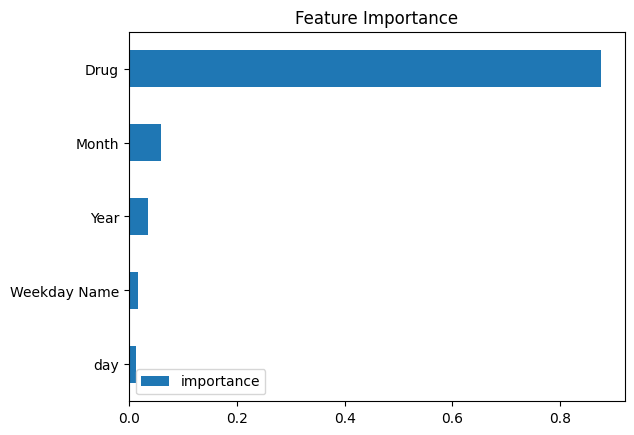

In [32]:
fi.sort_values('importance').plot(kind = 'barh', title = 'Feature Importance')
plt.show()

# **RANDOM FOREST**

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
reg_rf = RandomForestRegressor(max_depth=2, random_state=0)
reg_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [35]:
from sklearn.metrics import mean_squared_error

In [37]:
rf_pred = reg_rf.predict(X_test)
mse = mean_squared_error(y_test,rf_pred)
rmse = np.sqrt(mse)
rmse

np.float64(8.546336651758923)

In [38]:
#Deteccion y eliminacion de valores atipicos
Q1 = df_new['Quantity'].quantile(0.25)
Q3 = df_new['Quantity'].quantile(0.75)
Q1,Q3

(np.float64(1.81775), np.float64(8.0))

In [39]:
IQR = Q3 - Q1
IQR

np.float64(6.18225)

In [40]:
lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 1.5*IQR
lower_lim,upper_lim

(np.float64(-7.4556249999999995), np.float64(17.273375))

In [42]:
df_new_no_out = df_new[df_new['Quantity'] < 17.27]
df_new_no_out

,datum,Year,Month,Hour,Weekday Name,day,Drug,Quantity
0,2014-01-02,2014,1,248,4,2,0,0.00
1,2014-01-03,2014,1,276,0,3,0,8.00
2,2014-01-04,2014,1,276,2,4,0,2.00
3,2014-01-05,2014,1,276,3,5,0,4.00
4,2014-01-06,2014,1,276,1,6,0,5.00
...,...,...,...,...,...,...,...,...
16843,2019-10-04,2019,10,276,0,4,7,1.00
16844,2019-10-05,2019,10,276,2,5,7,0.33
16845,2019-10-06,2019,10,276,3,6,7,4.20
16846,2019-10-07,2019,10,276,1,7,7,1.00


In [44]:
train = df_new_no_out[df_new_no_out['Year'] < 2019]
test = df_new_no_out[df_new_no_out['Year'] >= 2019]

print(train.shape)
print(test.shape)

(12871, 8)
(2004, 8)


In [45]:
X_train = train.drop(['Hour', 'Quantity', 'datum'], axis = 1 )
y_train = train['Quantity']

X_test = test.drop(['Hour', 'Quantity', 'datum'], axis = 1 )
y_test = test['Quantity']

In [46]:
reg = xgb.XGBRegressor(n_estimators = 1000,early_stopping_rounds = 50, learning_rate = 0.005)
reg.fit(X_train, y_train,
        eval_set = [(X_train,y_train),(X_test,y_test)],
        verbose = 10)

[0]	validation_0-rmse:3.77075	validation_1-rmse:3.95353
[10]	validation_0-rmse:3.68647	validation_1-rmse:3.86429
[20]	validation_0-rmse:3.60832	validation_1-rmse:3.78183
[30]	validation_0-rmse:3.53603	validation_1-rmse:3.70612
[40]	validation_0-rmse:3.46925	validation_1-rmse:3.63821
[50]	validation_0-rmse:3.40756	validation_1-rmse:3.57499
[60]	validation_0-rmse:3.35068	validation_1-rmse:3.51700
[70]	validation_0-rmse:3.29825	validation_1-rmse:3.46341
[80]	validation_0-rmse:3.24993	validation_1-rmse:3.41390
[90]	validation_0-rmse:3.20544	validation_1-rmse:3.36796
[100]	validation_0-rmse:3.16445	validation_1-rmse:3.32528
[110]	validation_0-rmse:3.12660	validation_1-rmse:3.28646
[120]	validation_0-rmse:3.09158	validation_1-rmse:3.25066
[130]	validation_0-rmse:3.05936	validation_1-rmse:3.21802
[140]	validation_0-rmse:3.02962	validation_1-rmse:3.18752
[150]	validation_0-rmse:3.00227	validation_1-rmse:3.15961
[160]	validation_0-rmse:2.97715	validation_1-rmse:3.13370
[170]	validation_0-rmse:2

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.005, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

# **AJUSTE DE HIPERPARAMETROS**

In [47]:
#Defina la cuadricula de parametos para la busqueda por cuadricula.
param_grid = {
    'n_estimators': [100, 500, 1000],   #Number of tress in the forest
    'learning_rate': [0.01, 0.1, 0.2],  #Learning rate
    'max_depth': [3, 5, 7],              #Maximum depth of each tree
    'subsample': [0.8, 1.0],       #Subsample ratio of the training instances
    'colsample_bytree': [0.8, 1.0]  #Subsample ratio of columns when constructing each tree
}

In [51]:
#Crear el regresor XGBoost
xgb2 = xgb.XGBRegressor(random_state=42)

In [50]:
from sklearn.model_selection import GridSearchCV

In [53]:
#Realizar busqueda por rejilla o cuadricula con validacion cruzado.
grid_search = GridSearchCV(xgb2, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 500, 1000],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error')

In [54]:
# Imprime los mejores hiperparámetros y el error cuadrático medio correspondiente.
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Mean Squared Error:", -grid_search.best_score_)

# Evalúa el modelo en el conjunto de pruebas utilizando los mejores hiperparámetros.
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Test Root Mean Squared Error:", rmse)

Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best Mean Squared Error: 13.248703627299776
Test Root Mean Squared Error: 2.8238129827457046


In [55]:
test['Quantity Predictions'] = y_pred
test

/tmp/ipython-input-3726821739.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,datum,Year,Month,Hour,Weekday Name,day,Drug,Quantity,Quantity Predictions
1825,2019-01-01,2019,1,276,5,1,0,0.00,1.775229
1826,2019-01-02,2019,1,276,6,2,0,5.33,3.785674
1827,2019-01-03,2019,1,276,4,3,0,4.33,4.218023
1828,2019-01-04,2019,1,276,0,4,0,7.00,4.562105
1829,2019-01-05,2019,1,276,2,5,0,8.01,5.202791
...,...,...,...,...,...,...,...,...,...
16843,2019-10-04,2019,10,276,0,4,7,1.00,3.024243
16844,2019-10-05,2019,10,276,2,5,7,0.33,3.237680
16845,2019-10-06,2019,10,276,3,6,7,4.20,3.084826
16846,2019-10-07,2019,10,276,1,7,7,1.00,3.057086


In [56]:
import pickle

In [57]:
#save the model to disk
filename = 'pharma_model.sav'

In [59]:
pickle.dump(best_xgb, open(filename, 'wb'))

In [60]:
# load the model from disj
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.48791898629236974


In [61]:
y_pred = loaded_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(2.8238129827457046)

**EN PROMEDIO, EL MODELO SE EQUIVOCA EN CASU +- 3 UNIDADES DE LA VARIABLE OBJETIVO.**

In [67]:
#Drug range from 0 to 7
def predict_sales(start_date,end_date,drug):  #dates selected from celander and category(int) from options
  #Generate a range of dates
  dates = pd.date_range(start=start_date, end=end_date, freq='D')

  #Create the DataFrame with dates as the index
  df_test = pd.DataFrame(index=dates)
  df_test['Year'] = df_test.index.year
  df_test['Month'] = df_test.index.month
  df_test['Weekday Name'] = df_test.index.weekday
  df_test['day'] = df_test.index.day
  df_test['Drug'] = drug
  from sklearn.preprocessing import LabelEncoder
  le = LabelEncoder()
  #de_test['Weekday Name'] = le.fit_transform(df_test['Weekday Name'])
  df_test['predicted_quantity'] = loaded_model.predict(df_test)
  return df_test

In [68]:
predict_sales(start_date = '2023-01-01',end_date = '2023-01-31', drug = 0)

,Year,Month,Weekday Name,day,Drug,predicted_quantity
2023-01-01,2023,1,6,1,0,2.076571
2023-01-02,2023,1,0,2,0,4.207219
2023-01-03,2023,1,1,3,0,4.443470
2023-01-04,2023,1,2,4,0,4.987588
2023-01-05,2023,1,3,5,0,5.116125
2023-01-06,2023,1,4,6,0,4.388085
2023-01-07,2023,1,5,7,0,3.168835
2023-01-08,2023,1,6,8,0,4.365772
2023-01-09,2023,1,0,9,0,4.494853
2023-01-10,2023,1,1,10,0,5.628723
